**[Assignment] A2 - Clustering and Visualization**

**Tasks**

**Part 1. Visualizing Unlabeled Training Data.**

You are provided some unlabeled data in unlabeled.csv.Select the features you wish you use, and using Principal Component Analysis, plot your data points in 2dimensions. What is the explained variance for each component? Hint: Use sklearn's libraries and callStandardScaler before doing PCA.

In [225]:
# I used some external libraries:
# pandas：https://pandas.pydata.org/
# numpy：https://numpy.org/
# matplotlib：https://matplotlib.org/
# sklearn：https://scikit-learn.org/stable/

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Import the data and select the characteristics we want to use

In [226]:
# Import data
filename="unlabeled.csv"
df = pd.read_csv(filename)
Data = df.to_numpy()
print(Data)
#Delete the first and last columns
data = np.delete(Data, [0, -1], axis=1) 
print(data)

# Select the characteristics we want to use
choose_data = data[:, 1:289]
data_label = data[:, -1]
print(choose_data)
print(choose_data.shape)

[[0 0.975 0.087026 ... 0 0 'Training_1214649']
 [1 0.975 0.160786 ... 0 1 'Training_582538']
 [2 0.875 0.156973 ... 1 0 'Training_1269926']
 ...
 [197 0.875 0.178337 ... 0 0 'Training_374584']
 [198 0.975 0.071168 ... 0 0 'Training_2827611']
 [199 0.875 0.102173 ... 0 0 'Training_484328']]
[[0.975 0.087026 0.457144 ... 0 0 0]
 [0.975 0.160786 0.006717 ... 0 0 1]
 [0.875 0.156973 0.017771 ... 0 1 0]
 ...
 [0.875 0.178337 0.055344 ... 1 0 0]
 [0.975 0.071168 0.126356 ... 1 0 0]
 [0.875 0.102173 -0.01454 ... 0 0 0]]
[[0.087026 0.457144 -0.885125 ... 115.7 115.2 114.8]
 [0.160786 0.006717 -0.986966 ... 151.2 150.7 150.1]
 [0.156973 0.017771 -0.987443 ... 127.2 126.6 126.1]
 ...
 [0.178337 0.055344 -0.982412 ... 132.9 132.4 132.0]
 [0.071168 0.126356 -0.989429 ... 105.6 105.3 104.8]
 [0.102173 -0.01454 -0.99466 ... 146.0 145.4 144.8]]
(200, 288)


Use StandardScaler in SkLearn to process the data

In [227]:
scaler = StandardScaler()
choose_data = scaler.fit_transform(choose_data)

Use PCA to reduce the data to 2 dimensions and print explained_variance ratio and explained variance

In [228]:
pca = PCA(n_components = 2)

reduced_data = pca.fit_transform(choose_data)  

print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.35770975 0.34281146]
[103.53809722  99.22582908]


The data processed by PCA is visualized

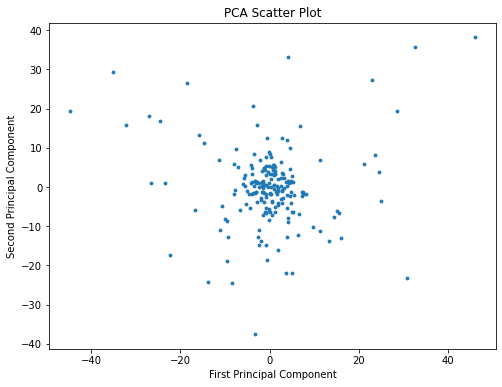

In [229]:
fig, ax = plt.subplots(1)
fig.set_size_inches(8,6)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='o', s=8)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

The explained variance of each component is 103.53809722 and 99.22582908. And the explained variance ratio of each component is 0.35770975 and 0.34281146 respectively.

PCA algorithm is realized independently:

In [230]:
def pca(X,k):#k is the components you want
    #mean of each feature
    n_samples, n_features = X.shape
    mean = np.array([np.mean(X[:,i]) for i in range(n_features)])
    #normalization
    norm_X = X-mean
    #scatter matrix
    scatter_matrix = np.dot(np.transpose(norm_X),norm_X)
    #Calculate the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(scatter_matrix)
    eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n_features)]
    # sort eig_vec based on eig_val from highest to lowest
    eig_pairs.sort(reverse=True)
    # select the top k eig_vec
    feature = np.array([ele[1] for ele in eig_pairs[:k]])
    #get new data
    data = np.dot(norm_X,np.transpose(feature))
    return data

**Part 2. K-Means and Silhouette Score.**

Using the PCA-reduced data (i.e, now each point is represented by2 numbers), perform K-Means clustering and calculate a silhouette score for various values of K. You may wish to plot the scores for easier visualization. What is the optimal silhouette score that you find, with which
value of K? What does this signify?

In [231]:
# I used some external libraries:
# numpy：https://numpy.org/
# matplotlib：https://matplotlib.org/
# sklearn：https://scikit-learn.org/stable/

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Perform K-Means clustering and calculate a silhouette score for various values of K. 

In [232]:
#The range of K values (N_clusters) is given
n_clusters = range(2, 20)

k_score = np.ones_like(n_clusters).astype(float)
for n in n_clusters:
    cluster = KMeans(n_clusters=n,random_state=10).fit(reduced_data)
    # Access the labels_ attribute to get the clustering result
    y_pred = cluster.labels_
    # Access the cluster_centers_ property to obtain the centroid coordinates
    centroid = cluster.cluster_centers_
    # Calculate the average silhouette score
    silhouette_avg = silhouette_score(reduced_data, y_pred)
    # Save
    k_score[n-2] = silhouette_avg

Draw the K score graph

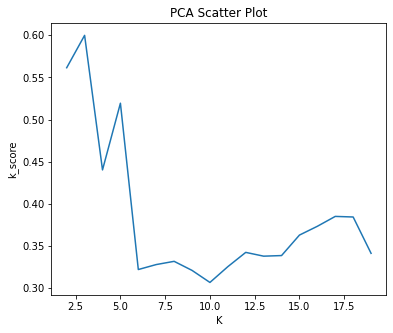

In [233]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6, 5)
ax.plot(n_clusters, k_score)
plt.xlabel('K')
plt.ylabel('k_score')
plt.title("PCA Scatter Plot")
plt.show()

I found that the best K value is 3. The closer the score of K value is to 1, the better the clustering effect is. This means that three categories of data from PCA are best.

K-means algorithm is realized independently:

In [234]:
# Calculate Euclidean distance
def distEclud(vecA, vecB):  
    return sqrt(sum(power(vecA - vecB, 2)))

#Construct cluster centers and take k random centroids
def randCent(dataSet, k): 
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))   
    for j in range(n):
        minJ = min(dataSet[:,j])
        maxJ = max(dataSet[:,j])
        rangeJ = float(maxJ - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k, 1)
    return centroids

def kMeans(dataSet, k, distMeans =distEclud, createCent = randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))    
    centroids = createCent(dataSet, k)
    # is used to judge whether the cluster has converged
    clusterChanged = True   
    while clusterChanged:
        clusterChanged = False;
        #Divide each data point into its nearest central point
        for i in range(m):  
            minDist = inf; minIndex = -1;
            for j in range(k):
                distJI = distMeans(centroids[j,:], dataSet[i,:])
                if distJI < minDist:
                    # If the i-th data point is closer to the JTH center point, then I is assigned to J
                    minDist = distJI; minIndex = j  
            if clusterAssment[i,0] != minIndex: clusterChanged = True;  
            clusterAssment[i,:] = minIndex,minDist**2   
        # recalculate the center point
        for cent in range(k): 
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A == cent)[0]]   
            centroids[cent,:] = mean(ptsInClust, axis = 0)
    return centroids, clusterAssment

**Part 3. Cluster Interpretation.**

Use your chosen K from Part 2 and visualize the clusters as calculated using
K-Means. In other words, each point should now be coloured based on the cluster it belongs to. Using the
faces image folder provided, inspect the clusters and the corresponding images. What labels can you
propose for the clusters? Note: There are 200 points in unlabeled.csv to analyze, but 300 images to avoid
simply inspecting the dataset for an answer.

In [235]:
# I used some external libraries:
# numpy：https://numpy.org/
# matplotlib：https://matplotlib.org/
# sklearn：https://scikit-learn.org/stable/
# Pillow/:https://pypi.org/project/Pillow/

import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

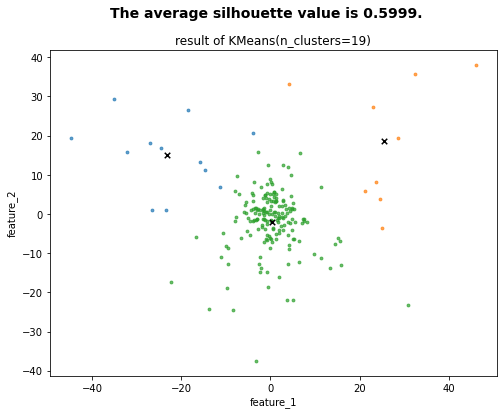

In [236]:
K = 3

fig, ax = plt.subplots(1)
fig.set_size_inches(8, 6)

cluster = KMeans(n_clusters=K,random_state=10).fit(reduced_data)
y_pred = cluster.labels_
centroid = cluster.cluster_centers_
silhouette_avg = silhouette_score(reduced_data, y_pred)

for i in range(K):
    ax.scatter(reduced_data[y_pred==i, 0],reduced_data[y_pred==i, 1],marker='o',s=8,alpha=0.7)   
ax.scatter(centroid[:, 0],centroid[:, 1],marker='x',s=30,c='k')   
ax.set_title('result of KMeans(n_clusters={})'.format(n))   
ax.set_xlabel('feature_1')    
ax.set_ylabel('feature_2')   
plt.suptitle('The average silhouette value is {:.4f}.'.format(silhouette_avg),
             fontsize=14, fontweight='bold')
plt.show()

In [237]:
image = Data[:, -1]
item_0 = image[y_pred==0]
item_1 = image[y_pred==1]
item_2 = image[y_pred==2]
print(item_0)
# print(item_1)
# print(item_2)

['Training_1154381' 'Training_748777' 'Training_1736801' 'Training_158782'
 'Training_1041361' 'Training_842233' 'Training_815036' 'Training_2929493'
 'Training_2278492' 'Training_1359028' 'Training_2594780'
 'Training_1915427']


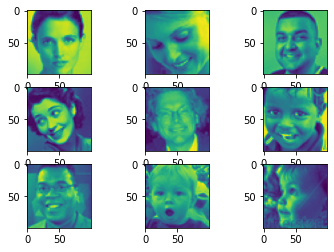

In [238]:
# Read the image_0 file
Num = 9
row = math.ceil(Num/3)
plt.figure()
for i in range(Num):
    name = item_0[i]
    image = Image.open(r'./images/' + name + '.jpg')  
    plt.subplot(row,3,i+1)
    plt.imshow(image)
plt.show()     

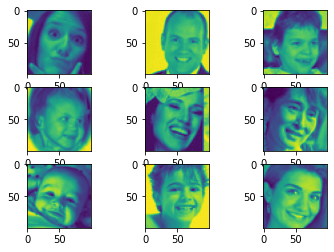

In [239]:
# Read the image_1 file
Num = 9
row = math.ceil(Num/3)
plt.figure()
for i in range(Num):
    name = item_1[i]
    image = Image.open(r'./images/' + name + '.jpg')  
    plt.subplot(row,3,i+1)
    plt.imshow(image)
plt.show()    

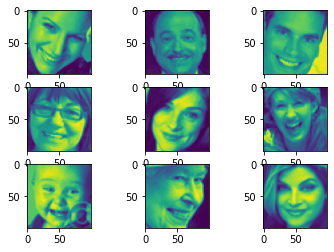

In [240]:
# Read the image_2 file
Num = 9
row = math.ceil(Num/3)
plt.figure()
for i in range(Num):
    name = item_2[i]
    image = Image.open(r'./images/' + name + '.jpg')  
    plt.subplot(row,3,i+1)
    plt.imshow(image)
plt.show()

Through the analysis of the three groups of classified pictures, I can roughly give the following labels:

* Label =0: indicates that the face is oriented to the left.
* Label =1: indicates that the face faces to the right.
* Label =2: indicates that the face is facing the front.
